<h1 style="text-align: center;">P5: Final Report</h1>
<h3 style="text-align: center;">By Charles Auble & Aditya Kundur</h3>


## Libraries used

In [28]:
from urllib.request import Request, urlopen
import time
from scipy import stats
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from sklearn.metrics import roc_auc_score

## Brief description of your data source 

We wanted to look at whether or not it is possbile to accuratley predict outcomes of football games based on popular stats as well as a traditional ranking system. We planned on looking at both the regular season as well as using the regular season as a training set to predit the playoffs. We wanted to compare a trained model vs. simply comparing single regular season stats of teams. We chose to look at turnovers and average offensive plays per game as individual statistics as these are talked about by coaches as being important stats to "win" in order to actually win the game.

In total we needed to collect data that described each teams regular season turnovers, regular season offensive plays per game, and each matchup and result from the regular seaoson and playoff from the 2024 season.

Our data source was the pro-football reference website. They offer detailed stats for each NFL season including, matchup results, stats from each game, as well as total team stats.



## Brief description of your crawler

Since our data source was a website we planned on downloading each page we need as an html and then using a parser to collect and store our data from there.

We needed several different pages of stats so we had to make a few different loops to iterate through different collections of URLs. The process for each was very similar but required a few tweaks depending on what we were trying to collect. The general idea of each scraper was to visit the URL, download it as an HTML file and save it to a local folder for later parsing. Iterations were required so we had the loop rest for 10 seconds to avoid overloading the website.

Below the two different scrapers we used seperated into different cells:

1. This parser downloaded each individual teams total stats from the regular season. This would allow us to parse out the turnovers and average offensive plays per game. Since we needed data for each individual team this required us to iterate through each team. We edited the url to subsitute each teams abbrivitation with each abbriviation. After being downloaded it would be named after the abriviation of each team and saved to a "Teams" folder.

In [2]:
#teams in nfl with their abbreviations from pro-football-reference
teams = ['crd','atl','rav','buf','car','chi','cin','cle','dal','den','det','gnb','htx',
         'clt','jax','kan','rai','sdg','ram','mia','min','nwe','nor','nyg','nyj','phi',
         'pit','sfo','sea','tam','oti','was']

##Iterate through list of teams and download regular season record for each team
for team in teams:
    
    tmp = 10.0
    print ('Sleep for ', tmp, ' seconds')
    time.sleep(tmp)

    
    url = 'https://www.pro-football-reference.com/teams/'+str(team)+'/2024/gamelog/'
    print ('Download data from :', url)
    
    # download
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()



    fileout = 'Teams/'+str(team)+'.html'
    print ('Save data to : ', fileout, '\n')

    #save file to disk
    f = open(fileout,'w')
    f.write(html.decode('utf-8'))
    f.close()

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/teams/crd/2024/gamelog/
Save data to :  Teams/crd.html 

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/teams/atl/2024/gamelog/
Save data to :  Teams/atl.html 

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/teams/rav/2024/gamelog/
Save data to :  Teams/rav.html 

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/teams/buf/2024/gamelog/
Save data to :  Teams/buf.html 

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/teams/car/2024/gamelog/
Save data to :  Teams/car.html 

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/teams/chi/2024/gamelog/
Save data to :  Teams/chi.html 

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/teams/cin/2024/gamelog/
Save data to :  Teams/cin.html 

Sleep 

2. This scraper was for collecting the indvidual matchups that took place during the 2024 regular season. Each individual URL displayed the results from 1 week. There are 18 weeks in a season so we needed to iterate through each week. The scraper would download the page for each respective week, name it "Week #" and save to a folder titled "Weeks". Weeks 19-22 were playoffs but the URLSs for each of those weeks were still numbers so we would break them up when we parsed the data. 

In [6]:
##Iterate through list of teams and download regular season record for each team
for i in range(1,23):
    
    tmp = 10.0
    print ('Sleep for ', tmp, ' seconds')
    time.sleep(tmp)

    
    url = 'https://www.pro-football-reference.com/years/2024/week_'+str(i)+'.htm'
    print ('Download data from :', url)
    
    # download
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()



    fileout = 'Weeks/'+'Week '+str(i)+'.html'
    print ('Save data to : ', fileout, '\n')

    #save file to disk
    f = open(fileout,'w')
    f.write(html.decode('utf-8'))
    f.close()

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/years/2024/week_1.htm
Save data to :  Weeks/Week 1.html 

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/years/2024/week_2.htm
Save data to :  Weeks/Week 2.html 

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/years/2024/week_3.htm
Save data to :  Weeks/Week 3.html 

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/years/2024/week_4.htm
Save data to :  Weeks/Week 4.html 

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/years/2024/week_5.htm
Save data to :  Weeks/Week 5.html 

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/years/2024/week_6.htm
Save data to :  Weeks/Week 6.html 

Sleep for  10.0  seconds
Download data from : https://www.pro-football-reference.com/years/2024/week_7.htm
Save data to :  Weeks/Week 7.html 


## Brief description of your parser

Since all our data came from the same source the parsing process was relativley simple. We iterated through each page similar to how it was originally downloaded and collected the data we wanted using beautiful soup to navigate the HTML code. This data was then saved to a Pandas dataframe and saved as a csv file.

Below is each individial parser seperated into different cells:

1. The first parser was for the individual team htmls we collected. In addition to turnovers we also decided to collect wins as well since we wanted to confirm that turnovers and average offensive plays per game were correlated to wins. We created lists for each stat and each iteration would collect the data point for that team and add it to its respective list it would then save the dataframe to a CSV called "nfl_team_stats".

In [5]:
#list of teams and their abriveations to itterate through
teams = ['crd','atl','rav','buf','car','chi','cin','cle','dal','den','det','gnb','htx',
         'clt','jax','kan','rai','sdg','ram','mia','min','nwe','nor','nyg','nyj','phi',
         'pit','sfo','sea','tam','oti','was']
turnovers=[]
wins=[]
avgOffensivePlays=[]

#parsing through each html file and pulling out their wins, turnovers, and total offensive plays which is turned into average offensive plays per game
for team in teams:
    
    filein = 'Teams/' + str(team) + '.html'
    soup = BeautifulSoup(open(filein), 'lxml')

    entry = soup.find('tfoot', attrs={'class' : ''})
    winColumn=entry.find('td',attrs={'data-stat':'team_game_result'})
    winLoss=winColumn.get_text();
    win=winLoss[:winLoss.index("-")]
    
    tColumn = entry.find('td', attrs={'data-stat': 'turnovers'})
    pColumn= entry.find('td', attrs={'data-stat':"plays_offense"})
    turnover=tColumn.get_text();
    offenseivePlays=pColumn.get_text();
    avgPlays=round(int(offenseivePlays)/17)
    turnovers.append(turnover)
    wins.append(win)
    avgOffensivePlays.append(avgPlays)
    print(str(team)+" data added")
    


# Combine data into a DataFrame
data = pd.DataFrame({
    'Team': teams,
    'Turnovers': turnovers,
    'Wins': wins,
    'Avg Offensive Plays': avgOffensivePlays
    })

#Save to CSV (no index column)
data.to_csv('nfl_team_stats.csv', index=False)

crd data added
atl data added
rav data added
buf data added
car data added
chi data added
cin data added
cle data added
dal data added
den data added
det data added
gnb data added
htx data added
clt data added
jax data added
kan data added
rai data added
sdg data added
ram data added
mia data added
min data added
nwe data added
nor data added
nyg data added
nyj data added
phi data added
pit data added
sfo data added
sea data added
tam data added
oti data added
was data added


2. The second parser we used was for the regular season results. The webpage displayed each matchup in its own table to the parser would go to each table collect the home team, away team, and their respective socres. It would determine a and winner based on the scores and save the home team, away team, and winner to a list. It would then save the created datafram to a CSV called "nfl_week_results".

In [18]:
#list of teams and their abriveations to itterate through
home_teams=[]
away_teams=[]
winners=[]


#parsing through each html file and pulling out their wins, turnovers, and total offensive plays which is turned into average offensive plays per game
for i in range(1,19):
    
    filein = 'Weeks/' +'Week '+ str(i) + '.html'
    soup = BeautifulSoup(open(filein), 'lxml')
    
    entry = soup.find('div', attrs={'class' : 'game_summaries'})
    games=entry.find_all('div',attrs={'class' : 'game_summary expanded nohover'})
    for game in games:
        result=game.find('table', attrs={'class' : 'teams'})
        toClean=result.get_text().strip()
        lines = [line.strip() for line in toClean.split("\n") if line.strip()]

        # Step 2: Extract
        home_team = lines[4]
        home_score = int(lines[5])
        away_team = lines[1]
        away_score = int(lines[2])

        # Step 3: Winner
        winner = home_team if home_score > away_score else away_team

        home_teams.append(home_team)
        away_teams.append(away_team)
        winners.append(winner)
    print("Week "+str(i)+" saved")

#Combine data into a DataFrame
data = pd.DataFrame({
    'Home': home_teams,
    'Away': away_teams,
    'Winner': winners,
    })

#Save to CSV (no index column)
data.to_csv('nfl_week_results.csv', index=False)

Week 1 saved
Week 2 saved
Week 3 saved
Week 4 saved
Week 5 saved
Week 6 saved
Week 7 saved
Week 8 saved
Week 9 saved
Week 10 saved
Week 11 saved
Week 12 saved
Week 13 saved
Week 14 saved
Week 15 saved
Week 16 saved
Week 17 saved
Week 18 saved


This parser is exactly the same as the previous one except we only itterated through the playoff weeks. We wanted to seperate them to make the later analysis easier to conduct. Results of these games were saved to "playoffs.csv"

In [20]:
#list of teams and their abriveations to itterate through
home_teams=[]
away_teams=[]
winners=[]


#parsing through each html file and pulling out their wins, turnovers, and total offensive plays which is turned into average offensive plays per game
for i in range(19,23):
    
    filein = 'Weeks/' +'Week '+ str(i) + '.html'
    soup = BeautifulSoup(open(filein), 'lxml')
    
    entry = soup.find('div', attrs={'class' : 'game_summaries'})
    games=entry.find_all('div',attrs={'class' : 'game_summary expanded nohover'})
    for game in games:
        result=game.find('table', attrs={'class' : 'teams'})
        toClean=result.get_text().strip()
        lines = [line.strip() for line in toClean.split("\n") if line.strip()]

        # Step 2: Extract
        home_team = lines[4]
        home_score = int(lines[5])
        away_team = lines[1]
        away_score = int(lines[2])

        # Step 3: Winner
        winner = home_team if home_score > away_score else away_team

        home_teams.append(home_team)
        away_teams.append(away_team)
        winners.append(winner)
    print("Week "+str(i)+" saved")

#Combine data into a DataFrame
data = pd.DataFrame({
    'Home': home_teams,
    'Away': away_teams,
    'Winner': winners,
    })

#Save to CSV (no index column)
data.to_csv('playoffs.csv', index=False)

Week 19 saved
Week 20 saved
Week 21 saved
Week 22 saved


## Brief description of the results of your data analysis & visualizations (include figures in the document)

Below each figure we will outine its indivudual purpose as well as our conclusions from each figure.

In [3]:
# Load CSV into a new DataFrame
df1 = pd.read_csv('nfl_week_results.csv')
df2 = pd.read_csv('nfl_team_stats.csv')
df3 = pd.read_csv('playoffs.csv')

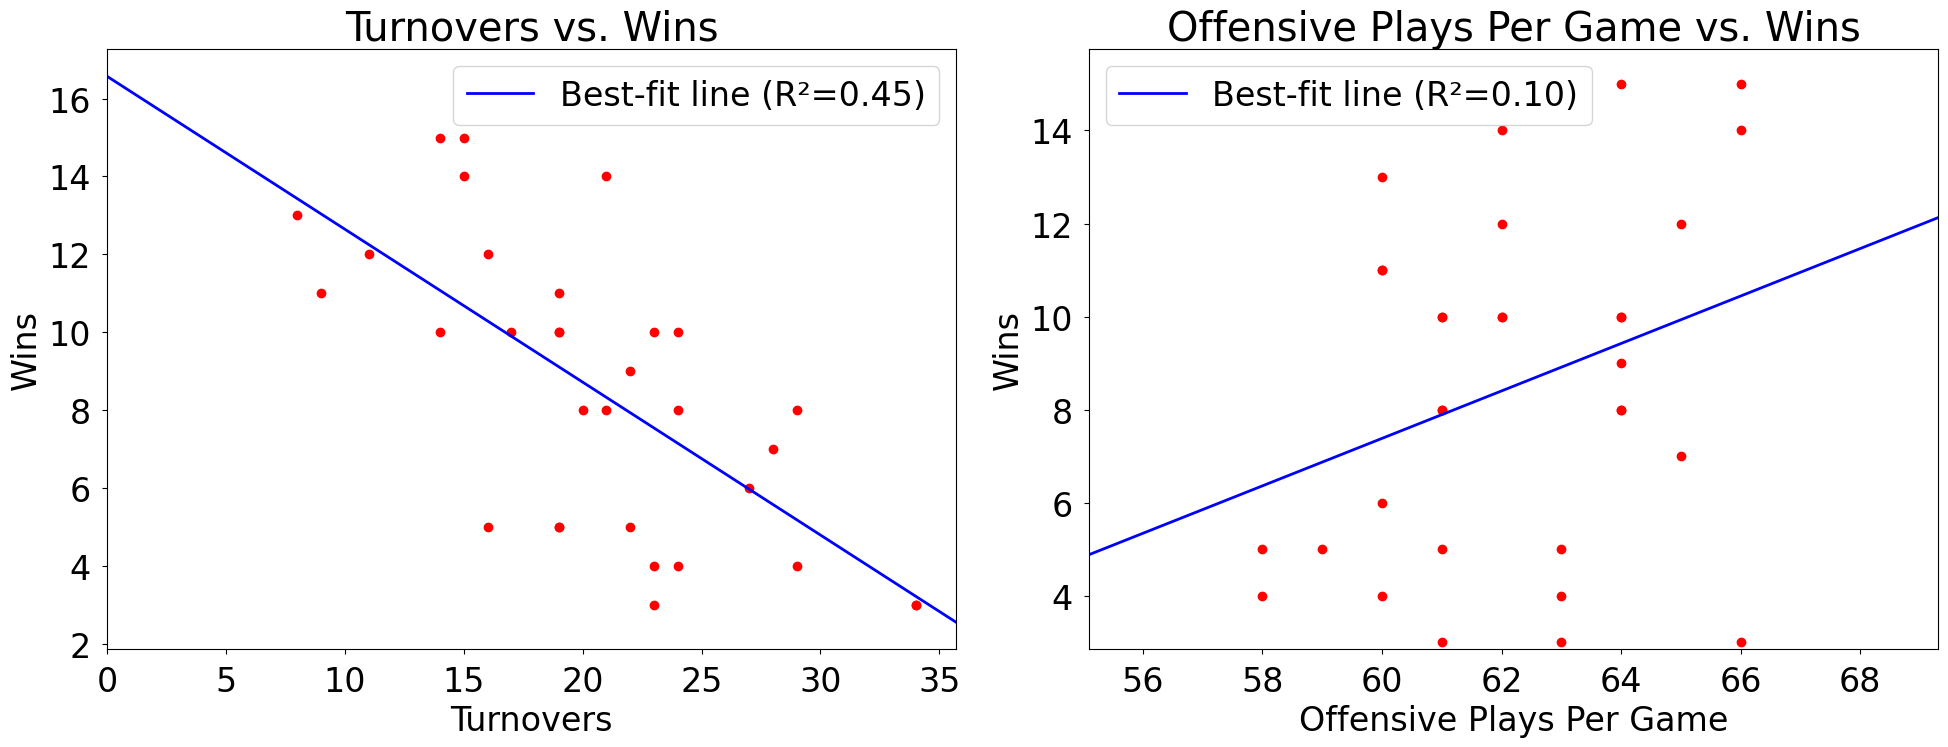

In [38]:
#creating figure
plt.figure(figsize=(20,8))
plt.rc('text', usetex=False)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

turnovers=df2['Turnovers']
avgOffensivePlays=df2['Avg Offensive Plays']
wins=df2['Wins']

#Organizing Data for ax1
sorted_idx = np.argsort(turnovers)
turnovers_sorted = turnovers[sorted_idx]
wins_sorted = wins[sorted_idx]

ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Turnovers')
ax1.set_ylabel('Wins')
ax1.set_title("Turnovers vs. Wins")
ax1.plot(turnovers_sorted, wins_sorted, marker='o', linestyle='None', color='r')

ax1.set_xlim(0, max(turnovers_sorted) * 1.05)

slope, intercept, r_value, p_value, std_err = stats.linregress(turnovers_sorted, wins_sorted)
x_line = np.linspace(0, max(turnovers_sorted) * 1.05, 100)
y_line = slope * x_line + intercept
ax1.plot(x_line, y_line, color='blue', linewidth=2, label=f'Best-fit line (R²={r_value**2:.2f})')
ax1.legend()

#Organizing Data for ax2
sorted_idx=np.argsort(avgOffensivePlays)
plays_sorted=avgOffensivePlays[sorted_idx]
wins_sorted = wins[sorted_idx]

ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Offensive Plays Per Game')
ax2.set_ylabel('Wins')
ax2.set_title("Offensive Plays Per Game vs. Wins")

ax2.plot(plays_sorted,wins_sorted,marker='o',linestyle='None', color='r')

ax2.set_xlim(min(plays_sorted) * 0.95, max(plays_sorted) * 1.05)
ax2.set_ylim(min(wins_sorted) * 0.95, max(wins_sorted) * 1.05)


slope, intercept, r_value, p_value, std_err = stats.linregress(plays_sorted, wins_sorted)
x_line = np.linspace(0, max(plays_sorted) * 1.05, 100)
y_line = slope * x_line + intercept
ax2.plot(x_line, y_line, color='blue', linewidth=2, label=f'Best-fit line (R²={r_value**2:.2f})')
ax2.legend()

#show figure
plt.tight_layout()
plt.show()

Before starting a deeper analysis we wanted to confirm that each stat we chose did indeed have a linear relationship with winning.

The first plot depicts the relationship between a teams total turnovers throughout a single season and their wins in that season

The second plot depicts the relationship between a teams total offensive plays per game and their wins in that season

The first plot shows a negative linear relationship, emphasizing the theory that a team that turns the ball over a lot doesn't win a lot

The second plot shows a positive linear relationship(although less strong than the first plot), suggesting that the more offensive plays a team has, the more wins they earn

In [39]:
#compute cumulative distribution
####################
def survival_function_from_data (data):
    sorted_data = sorted(data)
    x = []
    cx = []
    norm = 0.0
    for n in sorted_data:
        ##this is for visualization purposes only
        x.append(n)
        cx.append(1.0 - norm/float(len(sorted_data)+1.0))
        norm = norm + 1.0
        x.append(n)
        cx.append(1.0 - norm/float(len(sorted_data)+1.0))
    return x, cx
#####################

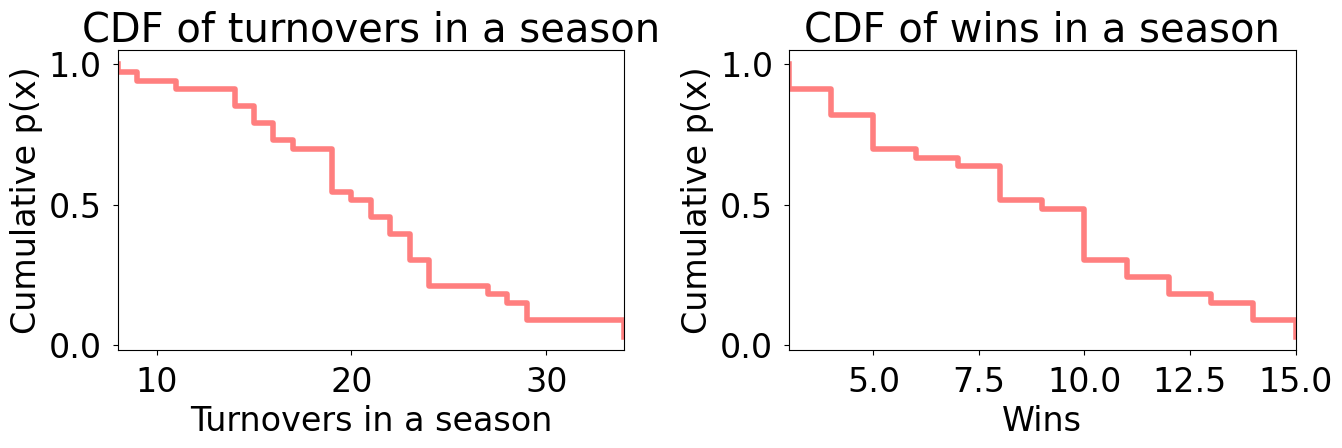

In [46]:
# Compute survival functions
x_turn, cx_turn = survival_function_from_data(turnovers)
x_win, cx_win = survival_function_from_data(wins)

fig, axes = plt.subplots(1, 2, figsize=(14,5))

plt.rc('text', usetex=False)
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

# --- Left plot: Turnovers ---
ax = axes[0]
ax.set_xlabel('Turnovers in a season')
ax.set_ylabel('Cumulative p(x)')
ax.set_title("CDF of turnovers in a season")
ax.plot(x_turn, cx_turn, color='red', linewidth=4.0, alpha=0.5)
ax.set_xlim(min(turnovers), max(turnovers))

# --- Right plot: Wins ---
ax = axes[1]
ax.set_xlabel('Wins')
ax.set_ylabel('Cumulative p(x)')
ax.set_title("CDF of wins in a season")
ax.plot(x_win, cx_win, color='red', linewidth=4.0, alpha=0.5)
ax.set_xlim(min(wins), max(wins))

plt.tight_layout()
plt.show()

We additionally wanted to confirm that there was a significant distribution of data points for turnovers and wins. If a single data point appeared too then we would be unable to conduct a robust analysis. We also wanted to test the theory of parody among NFL teams.

The first visulaisation is a cumulative distribution of each teams total turnovers in a season. Based on the visulisation it seems like the average turnovers for each team in a season is about 18. The visualisation suggests that a most teams have their total turnovers around 50% with extreme outliers on each side. We chose to do this visualisation to look at the despartity between the teams with high and low turnovers.

The second visualisation is a cumulative distribution of each teams wins throughout the regular season. This visulisation highlights the parity seen in the NFL with most teams wins being about 8 or 9 in a 17 game season which means they win about 50% of their games. We chose this visualisation to see if the theory that most NFL teams win about 50% of their games is true.

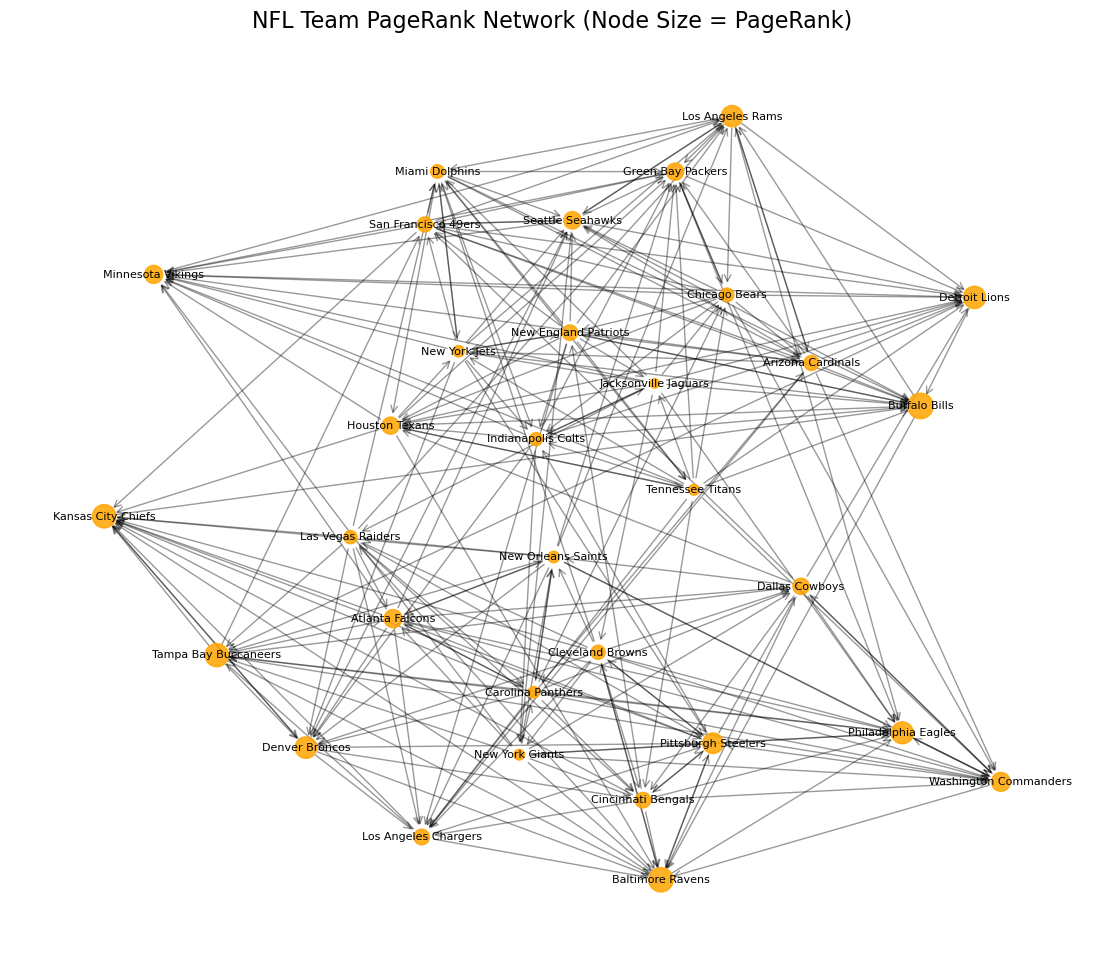

In [13]:
G = nx.DiGraph()

#Fixing abrreviations to match data 
name_to_abbrev = {
    'Arizona Cardinals':'crd','Atlanta Falcons':'atl','Baltimore Ravens':'rav','Buffalo Bills':'buf','Carolina Panthers':'car','Chicago Bears':'chi','Cincinnati Bengals':'cin',
    'Cleveland Browns':'cle','Dallas Cowboys':'dal','Denver Broncos':'den','Detroit Lions':'det','Green Bay Packers':'gnb','Houston Texans':'htx','Indianapolis Colts':'clt',
    'Jacksonville Jaguars':'jax','Kansas City Chiefs':'kan','Las Vegas Raiders':'rai','Los Angeles Chargers':'sdg','Los Angeles Rams':'ram','Miami Dolphins':'mia',
    'Minnesota Vikings':'min','New England Patriots':'nwe','New Orleans Saints':'nor','New York Giants':'nyg','New York Jets':'nyj','Philadelphia Eagles':'phi',
    'Pittsburgh Steelers':'pit', 'San Francisco 49ers':'sfo','Seattle Seahawks': 'sea','Tampa Bay Buccaneers':'tam', 'Tennessee Titans': 'oti', 'Washington Commanders': 'was'
}

# Index the team stats by abbreviation
stats = df2.set_index('Team')

turnovers_score = {}
offplays_score  = {}

for full_name, abbr in name_to_abbrev.items():
    row = stats.loc[abbr]
    # Fewer turnovers is better so use negative so a higher score = better
    turnovers_score[full_name] = -row['Turnovers']
    # More offensive plays is better
    offplays_score[full_name]  =  row['Avg Offensive Plays']

results_nfl = {'NFL_2024': []}


for _, row in df1.iterrows():
    home = row['Home']
    away = row['Away']
    winner = row['Winner']
    loser = away if winner == home else home  
 
    #store to match functions
    results_nfl['NFL_2024'].append(f"{winner} --> {loser}")
    G.add_edge(loser, winner)


playoff_pairs = []

for _, row in df3.iterrows():
    home   = row['Home']
    away   = row['Away']
    winner = row['Winner']
    loser  = away if winner == home else home
    playoff_pairs.append([winner, loser])

pr = nx.pagerank(G)
ranking = sorted(pr.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, k=0.35, seed=42)

node_sizes = [5000 * pr[t] for t in G.nodes()] 

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="orange", alpha=0.85)
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=12, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("NFL Team PageRank Network (Node Size = PageRank)", fontsize=16)
plt.axis("off")
plt.show()



Before our final analysis we created a network from the matchups from the regular season and used PageRank to rank them based on wins. The size of the dots are proportional to the rank of the teams(larger=better rank). While not neccessary to visualize we thought it would be interesting to see all 32 teams and the matchup outcomes.

### Helper Methods for Final Analysis

In [48]:
def perform_test(results, frac):
    train, test, set_of_players = split_training_and_testing(results, frac)

    pagerank, wins, frac_wins = build_network_and_compute_scores(train, set_of_players)

    auc_pagerank = compute_roc_auc_score(test, pagerank)

    auc_turnovers = compute_roc_auc_score(test, turnovers_score)

    auc_offplays  = compute_roc_auc_score(test, offplays_score)

    return auc_pagerank, auc_turnovers, auc_offplays

def average_over_multiple_realizations(results, frac, T):
    vec_auc_pagerank = []

    for _ in range(T):
        auc_pagerank, _, _ = perform_test(results, frac)
        vec_auc_pagerank.append(auc_pagerank)

    return np.mean(vec_auc_pagerank)

def sample_training_from_regular(results, frac):
    train = []
    set_of_players = set()
    for r in results:
        for q in results[r]:
            p1, p2 = [s.strip() for s in q.split(' --> ')]
            if random.random() < frac:
                train.append([p1, p2])
            set_of_players.add(p1)
            set_of_players.add(p2)
    return train, set_of_players


def average_playoff_auc(results, playoff_pairs, frac, T):
    vec_auc_pagerank  = []
    vec_auc_turnovers = []
    vec_auc_offplays  = []

    for _ in range(T):
        train, set_of_players = sample_training_from_regular(results, frac)
        pagerank, wins, frac_wins = build_network_and_compute_scores(train, set_of_players)

        auc_pg  = compute_roc_auc_score(playoff_pairs, pagerank)
        auc_to  = compute_roc_auc_score(playoff_pairs, turnovers_score)
        auc_off = compute_roc_auc_score(playoff_pairs, offplays_score)

        vec_auc_pagerank.append(auc_pg)
        vec_auc_turnovers.append(auc_to)
        vec_auc_offplays.append(auc_off)

    return (np.mean(vec_auc_pagerank),
            np.mean(vec_auc_turnovers),
            np.mean(vec_auc_offplays))
def split_training_and_testing (results, frac):

    train, test = [], []
    set_of_players = set()

    for r in results:
        for q in results[r]:
            d = q.split(' --> ')
            p1 = d[0].strip('\n')
            p2 = d[1].strip('\n')
            if random.random()<frac:
                train.append([p1, p2])
            else:
                test.append([p1, p2])
                
            set_of_players.add(p1)
            set_of_players.add(p2)

    return train, test, set_of_players

def build_network_and_compute_scores (train, set_of_players):

    G=nx.DiGraph()
    for i in range (0, len(train)):
        n1 = train[i][0] #winner
        n2 = train[i][1] #loser
        if G.has_edge(n2, n1):
            G[n2][n1]['weight'] += 1
        else:
            G.add_edge(n2, n1, weight=1)

    ######
    pagerank =  nx.pagerank(G, alpha=0.85)
    frac_wins, wins = {}, {}
    for n in G:
        wins[n] = float(G.in_degree(n, weight='weight'))
        frac_wins[n] = float(G.in_degree(n, weight='weight')/ ( G.in_degree(n, weight='weight') + G.out_degree(n, weight='weight')))
    ######

    ##fill entries for players not in training set
    for n in set_of_players:
        if n not in G:
            pagerank[n] = 0.0
            wins[n] = 0.0
            frac_wins[n] = 0.0

    return pagerank, wins, frac_wins
def compute_roc_auc_score (test, prediction_scores):
    ground_truth, scores  = [], []

    for i in range (0, len(test)):
        n1 = test[i][0]
        n2 = test[i][1]

        #########
        diff = prediction_scores[n1] - prediction_scores[n2]
        if diff > 0.0:
            gt = 1
        if diff < 0.0:
            gt = 0
        if diff == 0.0:
            gt = 1
            if random.random()<0.5:
                gt = 0
        ground_truth.append(gt)
        scores.append(abs(diff))
        ##########

    auc = roc_auc_score(np.array(ground_truth), np.array(scores))

    return auc

In [49]:
T = 100
x = []
y = []

for f in np.linspace(0, 1, 10):
    if f < 1.0:
        auc_pg = average_over_multiple_realizations(results_nfl, f, T)
        x.append(f)
        y.append(auc_pg)

x = np.array(x)
y = np.array(y)

T = 100
x_playoff = []
y_playoff = []

for f in np.linspace(0, 1, 10):
    if 0.0 < f < 1.0:
        auc_pg, auc_to, auc_off = average_playoff_auc(results_nfl, playoff_pairs, f, T)
        x_playoff.append(f)
        y_playoff.append([auc_pg, auc_to, auc_off])

x_playoff = np.array(x_playoff)
y_playoff = np.array(y_playoff)

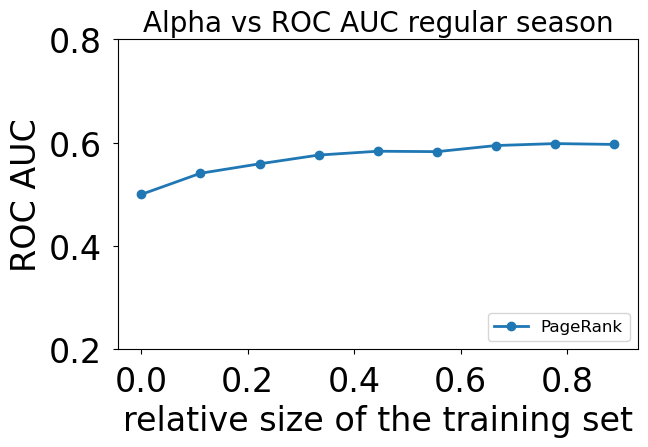

In [51]:
fig = plt.figure()
fig.set_size_inches(7, 5)

ax1 = fig.add_subplot(1, 1, 1)

ax1.set_xlabel('relative size of the training set')
ax1.set_ylabel('ROC AUC')
ax1.set_title("Alpha vs ROC AUC regular season", fontsize=20)
# Only PageRank is plotted
ax1.plot(x, y, marker='o', linewidth=2, label='PageRank')

ax1.set_ylim(0.2, 0.8)

ax1.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()


This was our test of our PageRank prediction model. We iterated a test set 100 times and increased the size of the training set. Although the model did get better with a larger training size, the maximum accuracy of the model tops out at around 60%. Suggesting that PageRank isn't a particular effective way of predicting outcomes. Additionally this goes to highlight the idea of team parody that was shown in the CDFs.

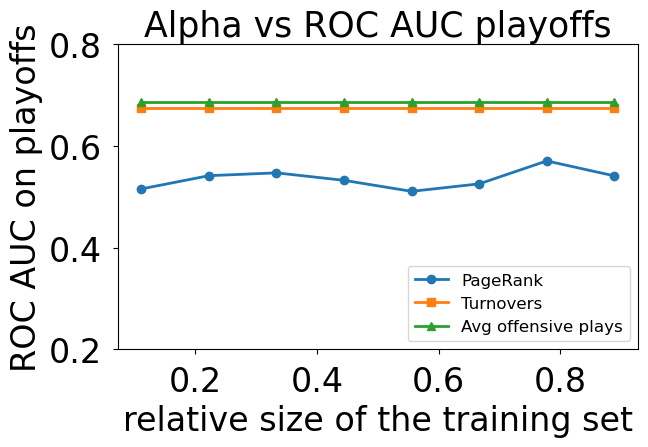

In [54]:
fig = plt.figure()
fig.set_size_inches(7, 5)
ax1 = fig.add_subplot(1, 1, 1)

ax1.set_xlabel('relative size of the training set')
ax1.set_ylabel('ROC AUC on playoffs')
ax1.set_title("Alpha vs ROC AUC playoffs", fontsize=25)

ax1.plot(x_playoff, y_playoff[:, 0], marker='o', linewidth=2, label='PageRank')
ax1.plot(x_playoff, y_playoff[:, 1], marker='s', linewidth=2, label='Turnovers')
ax1.plot(x_playoff, y_playoff[:, 2], marker='^', linewidth=2, label='Avg offensive plays')
ax1.set_ylim(0.2, 0.8)
ax1.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

We then looked to use the regular season as the training set and the playoffs as a test set. We increased the size of the training set to see if we saw a similar outcome from the previous test. We also compared this against the single statistics we collected at the end of the regular seaon. For turnovers and avg offensive plays the predicted winner was simply the team with the advantage at the end of the regular season and wasn't trained like PageRank was. This explains why they're a straight line. 

Suprisingly, Average offensive plays per game and turnovers proved to be a better predictor of outcomes than rankings from the regular season. Also, unlike the previous model it does not get better with more training data. This could be because of the limited number of teams in the playoffs and the limited number of matchups among "upper-tier" teams. Essentially, adding another data point of a playoff bound team beating a team with only 3-4 wins doesn't add any meaningful information to the model. 

## Discussion & conclusions 

Overall, we can conclude that for the data we collected, the best predictor of playoff sucess would be the turnover stat, followed closley by average offensive plays per game, with the worst predictor being a ranking from regular season matchups. We theorized this outcome was due to there only being 4 playoff games each team could play as well as them being playoff games. Both teams playing each other are "good" and becuase it is only 1 game, individual events, like turnovers, have a much larger impact on winning then consistent regular season success. If a team is in the playoffs its a given that they had regular season sucess.

Regarding what we learned, we got meaningful experience of scraping, parsing and analysing data. It was interesting to learn how to write code that can take data from the web and convert that into actionable data. This will almost certainly prove useful later.

If we were to continue this project we would expand our analysis to potentially rank based on win margin as well in addition to simply winning. We would also look at other "key" stats that coaches highlight before a game. We would also do this analysis again for previous seasons to see if this one was an outlier.